In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# sns.set()
%matplotlib inline

In [2]:
# lets load USArrests dataset
df = pd.read_csv('../data/USArrests.csv', index_col=0)
print(df.shape)
df.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


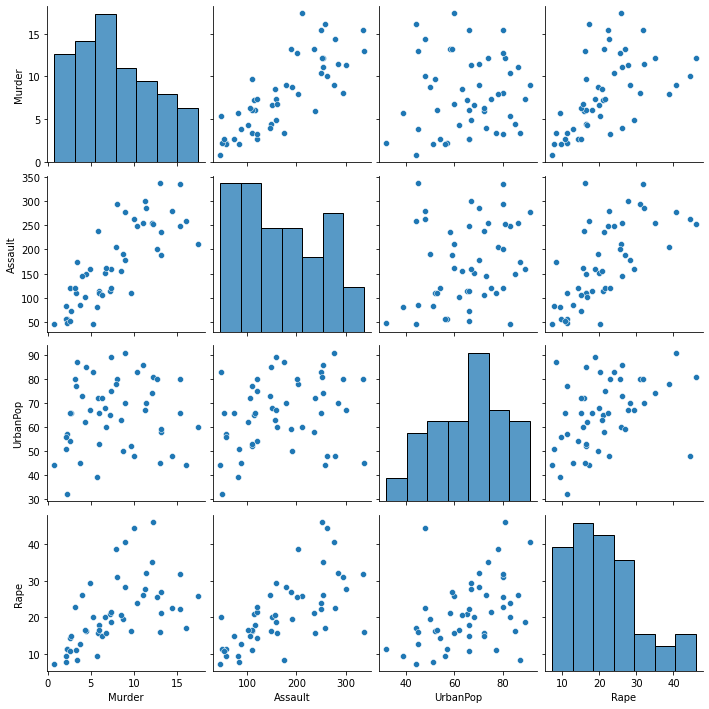

In [3]:
sns.pairplot(df)

## Figure 10.1
Let's look at the 2D projection of the USArrests dataset by doing PCA.

,Murder,Assault,UrbanPop,Rape
pc1,0.535899,0.583184,0.278191,0.543432
pc2,0.418181,0.187986,-0.872806,-0.167319


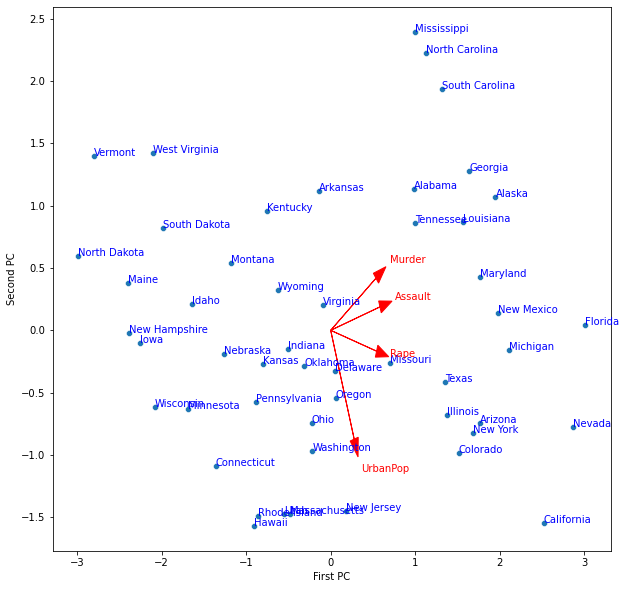

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_scaled = StandardScaler().fit_transform(df)
pca = PCA(n_components=2).fit(df_scaled)
df_2d = pca.transform(df_scaled)

# loading vector directions
dirs_df = pd.DataFrame(pca.components_, columns=df.columns, index=np.array(['pc1', 'pc2']))
display(dirs_df)

fig, ax = plt.subplots(figsize=(10, 10))
# 2D projection
sns.scatterplot(x=df_2d[:, 0], y=df_2d[:, 1], ax=ax)
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')

# annotate state names
for x, y, ind in zip(df_2d[:, 0], df_2d[:, 1], df.index.to_list()):
    ax.text(x, y, ind, color='blue')

# plot feature vector arrows
for feature in df.columns:
    dx, dy = dirs_df.loc['pc1', feature], dirs_df.loc['pc2', feature]
    ax.arrow(0, 0, dx, dy, color='r', head_width=0.1)
    ax.text(1.3*dx, 1.3*dy, feature, color='r')

## Figure 10.4: Variance explained

Text(0, 0.5, 'Cumulative Prop. of variance explained')

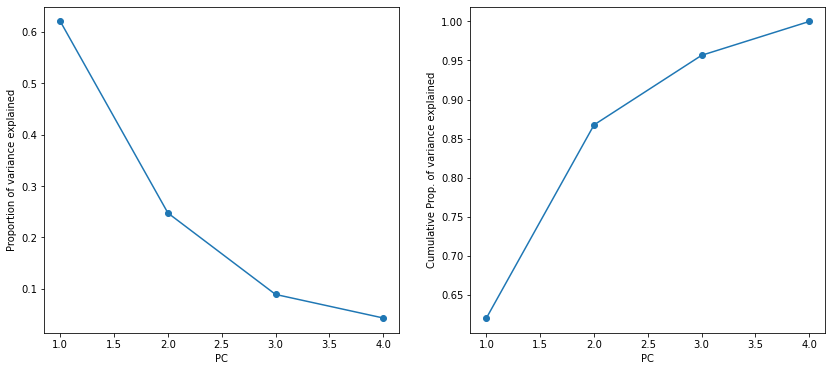

In [5]:
pca_4d = PCA().fit(df_scaled)
df_4d = pca_4d.transform(df_scaled)

fig, ax = plt.subplots(1,2,figsize=(14, 6))
# left plot: variance explained by each PC
ax[0].plot(range(1, 5), pca_4d.explained_variance_ratio_, '-o')
ax[0].set_xlabel('PC')
ax[0].set_ylabel('Proportion of variance explained')

# right plot: cumulative variance explained
ax[1].plot(range(1, 5), np.cumsum(pca_4d.explained_variance_ratio_), '-o')
ax[1].set_xlabel('PC')
ax[1].set_ylabel('Cumulative Prop. of variance explained')

## 10.4: Lab 1: PCA

In [6]:
df = pd.read_csv('../data/USArrests.csv', index_col=0)
print(df.shape)
df.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [7]:
df.mean(axis=0)

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
df.std(axis=0)**2

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [9]:
df_scaled = StandardScaler().fit_transform(df)
pca = PCA().fit(df_scaled)
# PCs or loading vectors
pca.components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [10]:
# variance explained
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [11]:
# proportion of variance explained
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

## 10.6: Lab 3: NCI60

In [12]:
nci_df = pd.read_csv('../data/NCI60.csv', index_col=0)
print(nci_df.shape)
nci_df.head()

(64, 6831)


,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830,labs
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,CNS
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,CNS
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,CNS
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,RENAL
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,BREAST


In [13]:
nci_df.describe()

,data.1,data.2,data.3,data.4,data.5,data.6,data.7,data.8,data.9,data.10,...,data.6821,data.6822,data.6823,data.6824,data.6825,data.6826,data.6827,data.6828,data.6829,data.6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232520,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


In [14]:
nci_df.labs.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
COLON          7
BREAST         7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
MCF7D-repro    1
MCF7A-repro    1
K562A-repro    1
UNKNOWN        1
K562B-repro    1
Name: labs, dtype: int64

In [15]:
# let's perform pca on nci_df data
labels = nci_df.labs
nci_df.drop(columns='labs', inplace=True)
nci_scaled = StandardScaler().fit_transform(nci_df)
pca_nci = PCA().fit(nci_scaled)
nci_trans = pca_nci.transform(nci_scaled)

Text(0, 0.5, 'PC3')

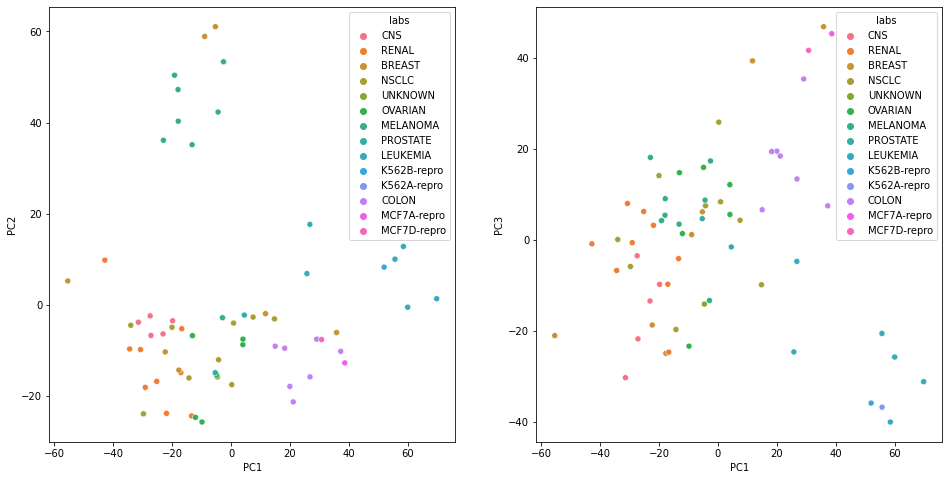

In [16]:
# plot the first 3 principal components to identify clusters, if any
fig,ax = plt.subplots(1, 2, figsize=(16, 8))
# pc1 vs. pc2
sns.scatterplot(x=nci_trans[:, 0], y=nci_trans[:, 1], hue=labels, ax=ax[0])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
# pc1 vs. pc3
sns.scatterplot(x=nci_trans[:, 0], y=nci_trans[:, 2], hue=labels, ax=ax[1])
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC3')

Text(0, 0.5, 'Cumulative PVE')

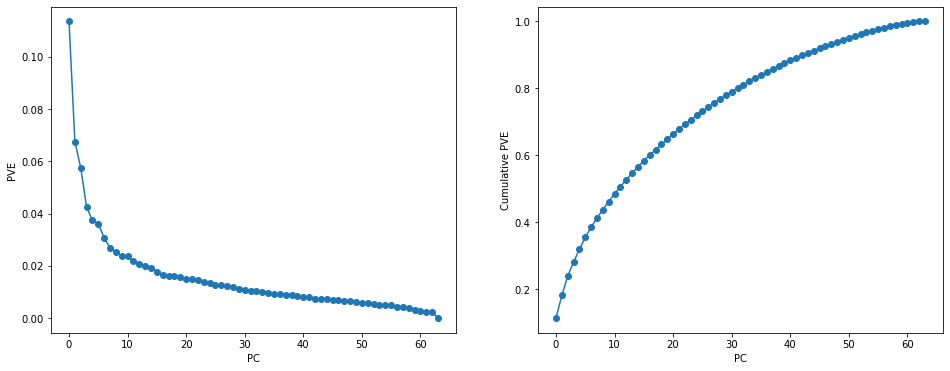

In [17]:
# Proportion of variance explained
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(pca_nci.explained_variance_ratio_, '-o')
ax[0].set_xlabel('PC'); ax[0].set_ylabel("PVE")
ax[1].plot(np.cumsum(pca_nci.explained_variance_ratio_), '-o')
ax[1].set_xlabel('PC'); ax[1].set_ylabel("Cumulative PVE")

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

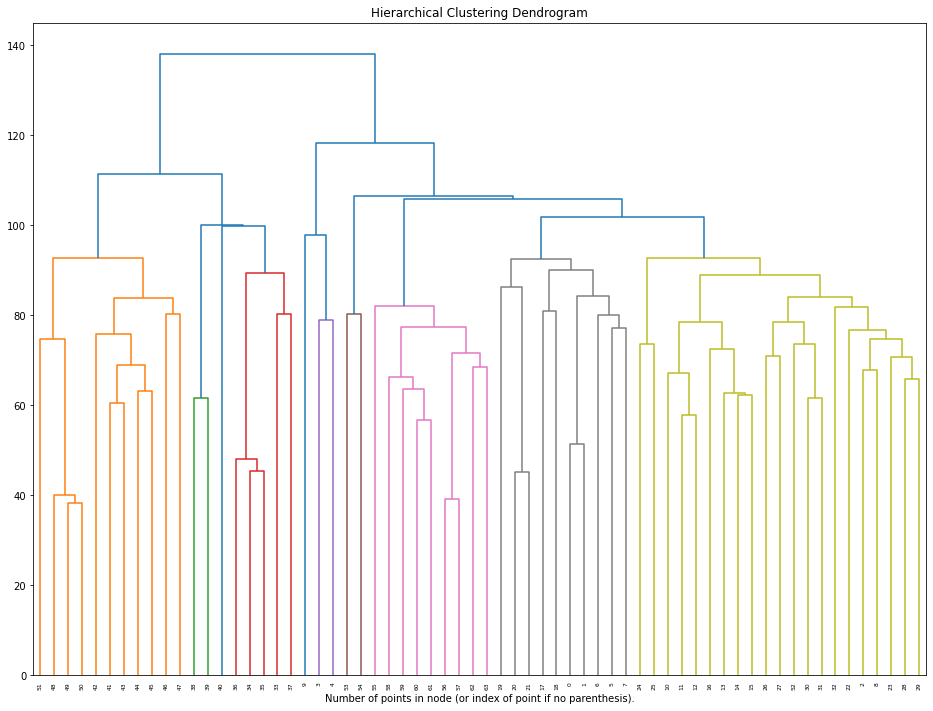

In [18]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

X = nci_df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')

model = model.fit(X)
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')
ax.set_xlabel("Number of points in node (or index of point if no parenthesis).")